In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [142]:
#Read CSV
body_df = pd.read_csv('body_performance_data.csv')
body_df = pd.DataFrame(body_df)

body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [143]:
#Check the value count of ages
age_count = body_df.value_counts("age")
age_count

age
21    964
22    789
23    668
25    644
26    629
24    617
27    546
28    527
29    407
30    374
60    368
31    338
37    282
32    275
62    265
61    254
39    243
36    239
38    230
63    230
34    229
33    229
35    223
41    217
64    215
40    211
56    197
48    196
43    192
59    192
51    191
50    189
55    185
45    183
57    181
46    181
58    180
42    179
47    172
44    172
49    163
54    152
52    140
53    135
dtype: int64

<AxesSubplot:ylabel='Density'>

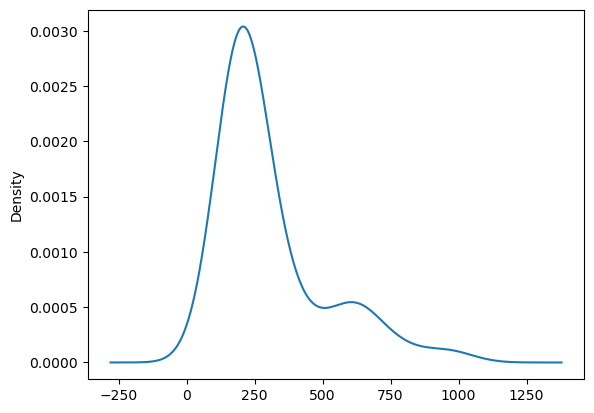

In [144]:
#visualize value count to determine bucketing better

age_count.plot.density()

In [145]:
#Make a dataframe of ages to manipulate
age_df = pd.DataFrame(age_count)
age_df = age_df.reset_index()
age_df.columns = ["age", "counts"]
age_df.head(10)

,age,counts
0,21,964
1,22,789
2,23,668
3,25,644
4,26,629
5,24,617
6,27,546
7,28,527
8,29,407
9,30,374


In [146]:
#Sort by ages descending to visualize

age_df.sort_values("age", ascending=True)

,age,counts
0,21,964
1,22,789
2,23,668
5,24,617
3,25,644
4,26,629
6,27,546
7,28,527
8,29,407
9,30,374


In [147]:
#rename Class to level because would not recognize class as column
body_df.rename(columns={"class": "level"}, inplace=True)
body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,level
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [148]:
#is gender signficantly skewed to one or the other and how account for that. F looks to be just over 1 third
gender_count = body_df.value_counts("gender")
gender_count

gender
M    8467
F    4926
dtype: int64

In [160]:
#Breakdown of gender by class.  Need to add in percentage to see if it matters
gender_class = body_df.groupby(["level", "gender"])["gender"].count()
print(gender_class)

level  gender
A      F         1484
       M         1864
B      F         1185
       M         2162
C      F         1112
       M         2237
D      F         1145
       M         2204
Name: gender, dtype: int64


In [149]:
level_count = body_df.value_counts("level")
level_count

level
C    3349
D    3349
A    3348
B    3347
dtype: int64

In [ ]:
# Bin ages. Most common is 250 ish range
# 20s as individual years
# 30-34
# 35-39
# 40-44
# 45-49
# 50-54
# 55-59


In [161]:
# OneHotEncoder or Get_dummies on Gender
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

encoded = pd.DataFrame(enc.fit_transform(body_df.gender.values.reshape(-1,1)))

encoded.columns = enc.get_feature_names(['gender'])
encoded.head()


C:\Users\mered\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_F,gender_M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [162]:
#If keeping class/level in one column as Y, Encode with dictionary values

level_num = {"A":1, "B":2, "C":3, "D":4}

body_df["level_num"] = body_df["level"].apply(lambda x: level_num[x])

body_df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,level,level_num
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,3
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,3
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,2
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,2


In [163]:
#Using oneHotEncoder for class into 4 separate

encode2 = pd.DataFrame(enc.fit_transform(body_df.level.values.reshape(-1,1)))

encode2.columns = enc.get_feature_names(['level'])
encode2.head()

C:\Users\mered\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,level_A,level_B,level_C,level_D
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [164]:
#Drop columns and merge encoded df
#Ignoring encode2 for now
body_df = body_df.drop(["gender", "level"], axis=1)

body_df2 = body_df.merge(encoded, left_index=True, right_index=True)
body_df2.head()


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,level_num,gender_F,gender_M
0,27,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3,0.0,1.0
1,25,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0.0,1.0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3,0.0,1.0
3,32,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2,0.0,1.0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2,0.0,1.0


In [165]:
#Set X, y 
X = body_df2.copy()
X = X.drop("level_num", axis=1)

y = body_df2["level_num"].ravel()

X.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_F,gender_M
0,27,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0.0,1.0
1,25,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0.0,1.0
2,31,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0.0,1.0
3,32,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0.0,1.0
4,28,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0.0,1.0


In [166]:
y[:10]

array([3, 1, 3, 2, 2, 2, 4, 2, 3, 2], dtype=int64)

In [167]:
#Split train/test data and scale using Standard Scaler at this time (mean of 0).  #Should we use MinMax(0-1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
#Trying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.740519558077038


In [169]:
feature_importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25385214916796073, 'sit and bend forward_cm'),
 (0.13316410662839206, 'sit-ups counts'),
 (0.0981233583164194, 'body fat_%'),
 (0.08722452143688555, 'age'),
 (0.08597582917437464, 'weight_kg'),
 (0.08215866228476268, 'gripForce'),
 (0.07543294552534861, 'broad jump_cm'),
 (0.06362878560553813, 'height_cm'),
 (0.05282604108712055, 'systolic'),
 (0.0503778857525596, 'diastolic'),
 (0.008639576553306631, 'gender_F'),
 (0.008596138467331448, 'gender_M')]

In [170]:
#Accuracy score and confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

predictions = rf_model.predict(X_test_scaled)
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7446999104210212


In [171]:
# printing confusion matrix but error:      Shape of passed values is (4, 4), indices imply (2, 2) Needs to be resolved
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"])
display(cm_df)

ValueError: Shape of passed values is (4, 4), indices imply (2, 2)

In [172]:
#Classification report for random forest

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.87      0.79       824
           2       0.63      0.63      0.63       827
           3       0.74      0.66      0.69       835
           4       0.90      0.82      0.86       863

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349



In [ ]:
# Need to test feature importances. THis is one way but plot is not showing up how I'd like. Need to adjust.

features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [174]:
# Binning of Age? if so will need to also be encoded/scaled.

# Open in Google Collab or here and import tensor flow to run as Neural Network

# Try MinMax Scaler  #Should I scale entire 

# Try with multiply Y columns as output. Can I do this with trees or only neural network?